In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# read the pre processed data
df = pd.read_csv('deltastemr2.csv')
# grab only the predictions using stock
df = df[['names', 'stpredem']]

In [4]:
df = df.sort_values(by=['stpredem'], ascending=False)
c = list(df.names)

In [6]:
df.head()

,names,stpredem
1496,Genpact,0.965192
471,IPG,0.837356
1495,Telaria,0.835815
445,Trimble,0.757994
1404,American Woodmark Corporation,0.683805


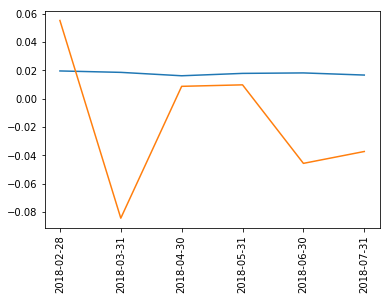

In [7]:
temp = pd.read_csv('deltastem/' + c[0] + '.csv')
temp = temp.set_index('as_of_date')
plt.plot(temp.percentemp)
plt.plot(temp.percentstock)
plt.xticks(rotation='vertical')
plt.show()

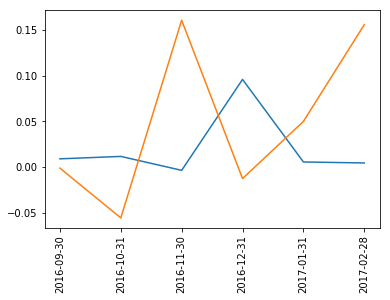

In [8]:
temp = pd.read_csv('deltastem/' + c[1] + '.csv')
temp = temp.set_index('as_of_date')
plt.plot(temp.percentemp)
plt.plot(temp.percentstock)
plt.xticks(rotation='vertical')
plt.show()

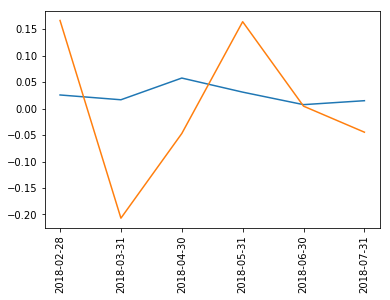

In [9]:
temp = pd.read_csv('deltastem/' + c[2] + '.csv')
temp = temp.set_index('as_of_date')
plt.plot(temp.percentemp)
plt.plot(temp.percentstock)
plt.xticks(rotation='vertical')
plt.show()

In [10]:
linkedin = pd.read_csv('temp_datalab_records_linkedin_company.csv', low_memory=False)

In [11]:
validcomp = df.names

In [338]:
# get the industry category for each company
compind = {key:np.array([]) for key in linkedin.industry.unique()}
for c in validcomp:
    k = linkedin[linkedin.company_name == c].iloc[0].industry
    # grab r2 for each category
    r2 = df[df.names == c].stpredem
    x = compind[k]
    x = np.append(x,r2.values)
    compind[k] = x

In [339]:
avgDict = {}
countDict = {}
for k,v in compind.items():
    if len(v)>0:
        avgDict[k] = sum(v)/ float(len(v))
        countDict[k] = len(v)

In [340]:
counts = pd.Series(countDict)
counts = counts[counts>50]

In [341]:
k = list(counts.index)
ind = { nk: compind[nk] for nk in k }
len(ind)

7

In [342]:
labels, data = [*zip(*ind.items())]

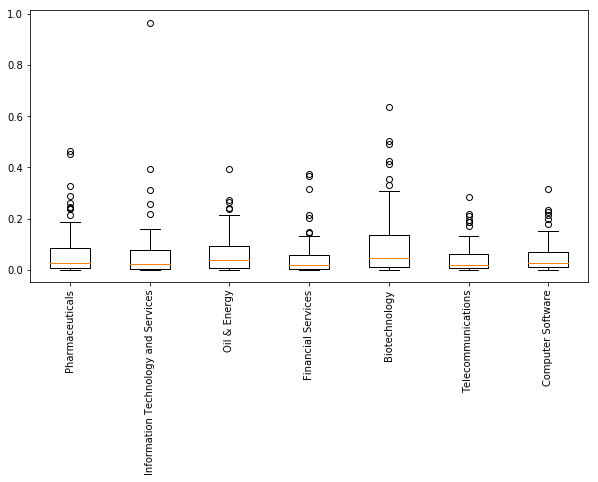

In [347]:
plt.subplots(figsize=(10,5))
plt.boxplot(data)
plt.xticks(range(1,8), labels, rotation='vertical')
plt.show()